Prompt ablations for different ways of prompting LLMs to fill entire survey questionnaires

In [1]:
dir_discriminator = '../results/discriminator_test/'

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
from plot_utils.plot_utils import plot_discriminator

In [6]:
from plot_utils.models import hf_models, model_names, model_sizes

discriminator_models = list(set(hf_models) - set(['mpt', 'mpt-chat', 'mpt-instruct']))
discriminator_models = sorted(discriminator_models, key=lambda x: model_sizes[x])

# get the discriminator test metrics for discriminating U.S. states
s_acs = pd.read_csv(f'{dir_discriminator}/states_accuracies.csv')
s_acs = s_acs.groupby(['s'])['xgboost'].mean()
mean_s = s_acs.mean() * 100
lower_s = mean_s - 2 * s_acs.std() * 100
upper_s = mean_s + 2 * s_acs.std() * 100

### "Question", "Answer" template resembling few-shot question answering tasks

[0.06283667320920104, 0.05787235955099763, 0.06054690330644502, 0.05612165357506826, 0.058912201622415436, 0.060771210289082785, 0.06318645028801533, 0.05720688332709579, 0.06436402333602223, 0.06326806066254884, 0.057166423711824975, 0.09963495872433495, 0.10677634335375968, 0.0691522053155213, 0.04300220924557231, 0.09963889802682462, 0.06940093659310435, 0.08580354013675577, 0.10029674720547996, 0.10950592164353508, 0.06972981786868603, 0.0753721433952894, 0.12194928249071454, 0.2426706873522228, 0.22534348781360394, 0.17580383853878495]


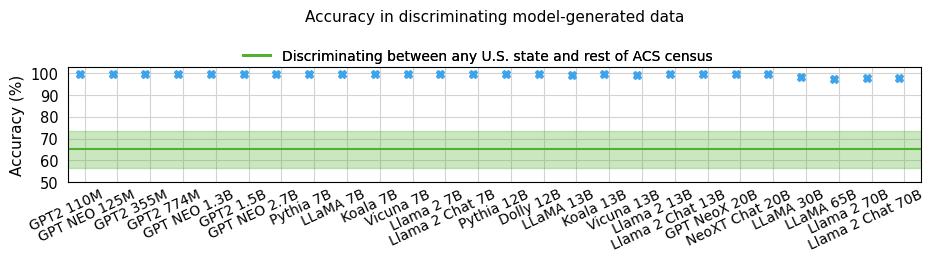

In [8]:
prompt = 'qa'
accuracies = {}
for m in discriminator_models:
    file = f'{dir_discriminator}{prompt}/{m}_accuracies.csv'
    if os.path.exists(file):
        accuracies[m] = pd.read_csv(file)['xgboost']

discriminator_models = list(accuracies.keys())
plot_discriminator(accuracies, None, discriminator_models, model_names, 
                   figsize=(11., 1.5), legendx=0.75,
                   mean_s=mean_s, lower_s=lower_s, upper_s=upper_s)

plt.ylim([50, 103])
plt.show()

### "Interviewer", "Me" template used by Argyle et al

[0.09146452864362228, 0.09948366700117198, 0.09714751669497117, 0.10021631603686061, 0.10158242958307281, 0.10023791697755913, 0.10121516684766164, 0.09014715747043839, 0.10215400139005891, 0.09803511231455714, 0.11566773797234511, 0.11089016930621351, 0.149083633414493, 0.0976562849999951, 0.08022817460219454, 0.0979467202105297, 0.10754956996659713, 0.11280864328587785, 0.11375412080447925, 0.14557145799474663, 0.09996919525533754, 0.10413352005958552, 0.1390272994774767, 0.1600531161833458, 0.16341162749327254, 0.17949941504083064]


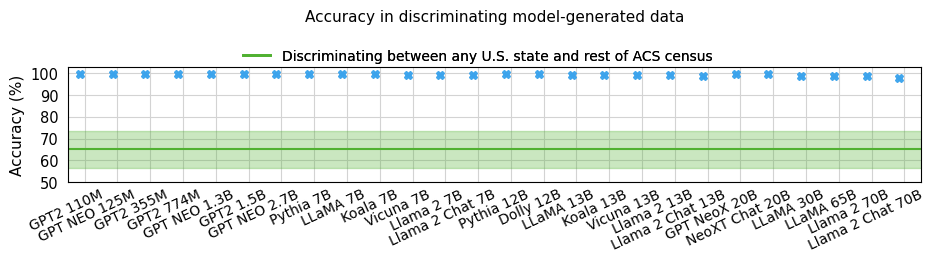

In [9]:
prompt = 'interview'
accuracies = {m: pd.read_csv(f'{dir_discriminator}{prompt}/{m}_accuracies.csv')['xgboost'] 
              for m in discriminator_models}

plot_discriminator(accuracies, None, discriminator_models, model_names, 
                   figsize=(11., 1.5), legendx=0.75,
                   mean_s=mean_s, lower_s=lower_s, upper_s=upper_s)

plt.ylim([50, 103])
plt.show()